In [12]:
# Used for openning images
from PIL import Image

# Used for displaying images
from IPython.display import display

# Used for manipulating images as an array of values
import numpy as np

# Used for showing graph of values of imported images
import matplotlib.pyplot as plt

# Used for rounding values appropiately
import math

# Used for saving images and searching directories
import os

# Encoding Image to ASCII

## Importing and Grayscaling Image

In [13]:
# Open the image
black_white_image = Image.open("input-imgs/hot-dog.png").convert('L')

# Convert the image to a NumPy array
black_white_image_array = np.array(black_white_image)

In [14]:
# Convert the edited array back to an image
black_white_image = Image.fromarray(black_white_image_array)

# Shows the grayscaled image
#display(black_white_image)

# Prints the resolution of the image
width, height = black_white_image.size
#print("Resolution: " + str(width) + "x" + str(height))

## Changing Resolution

In [15]:
# Function to perform the averaging operation
def average_cells(arr):
    # Removing pixels to ensure that both resolution values are even
    if(len(arr) % 2 != 0):
        arr= np.delete(arr, 0, axis=0)

    if(len(arr[0]) % 2 != 0):
        # Checking and adjusting horizontal resolution
        # Removing the first column
        arr = arr[:, 1:]
    
    n, m = arr.shape[0] // 2, arr.shape[1] // 2
    return arr.reshape(n, 2, m, 2).mean(axis=(1, 3)).astype(int)

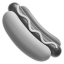

New Resolution: 64x64


In [16]:
# Iterates the averaging cells function to reduce resolution
# x and y values can be modified to change the new resolution, variables or parameters in while loop are modifiable
x = 1001
y = 1001
while x > 100 and y > 100:
    
    x = len(black_white_image_array[0])
    y = len(black_white_image_array)
    
    if(x > 64 and y > 64):
        black_white_image_array = average_cells(black_white_image_array)

        x = len(black_white_image_array[0])
        y = len(black_white_image_array)

# Creates the a new image from the new array
black_white_image_low_res = Image.fromarray(black_white_image_array.astype('uint8'))

# Shows the image and its new resolution
display(black_white_image_low_res)
print("New Resolution: " + str(x) + "x" + str(y))

## Graphing Values Present in Image

In [17]:
# Setting bin counts used to define the number of ASCII characters present in the ASCII art (13 is recommended)
image_bin_count = 13

# Computing histogram values and the bin edges
hist, bin_edges = np.histogram(black_white_image_array, bins=image_bin_count)

# Print histogram values and bin edges
#print("Histogram values:", hist)
#print("Bin edges:", bin_edges)

# Optionally, plot the histogram
#plt.hist(black_white_image_array, bins=image_bin_count, edgecolor='#A7C7E7')
#plt.xlabel('Pixel Value')
#plt.ylabel('Pixel Value Frequency')
#plt.title('Histogram of Pixel Values')
#plt.show()

## ASCII Characters Lists

In [18]:
ALL_ASCII_CHARS = ['$', '@', 'B', '%', '8', '&', 'W', 'M', '#', '*', 'o', 'a', 'h', 'k', 'b', 'd', 'p', 'q', 'w', 'm', 'Z', 'O', '0', 'Q', 'L', 'C', 'J', 'U', 'Y', 'X', 'z', 'c', 'v', 'u', 'n', 'x', 'r', 'j', 'f', 't', '/', '\\', '|', '(', ')', '1', '{', '}', '[', ']', '?', '-', '_', '+', '~', '<', '>', 'i', '!', 'l', 'I', ';', ':', ',', '^', '`', "'", '.']
STYLE_ASCII_CHARS = ["@", "#", "$", 'B', "%", "?", "*", "+", ';', ":", ",", ".", " "]

FULL_ASCII_CHARS = STYLE_ASCII_CHARS

## Converting Pixel Integer Values to ASCII

In [9]:
# Function to convert values in numpy array to ASCII characters
def set_ascii_chars(image_array):
    
    # Array to fill with values representing ASCII art
    ascii_image = []
    
    # Loops through the rows of the input array
    for i in range(len(image_array)):
        
        # Array to fill with values representing lines in ASCII art
        ascii_image_line = []
        
        # Loops through elements in line of numpy array
        for j in range(len(image_array[i])):
            
            # Appends ASCII character to row list based on 
            for k in range(len(bin_edges)-1):
                if(image_array[i][j] == bin_edges[k+1]):
                    ascii_image_line.append(FULL_ASCII_CHARS[k])

                elif(image_array[i][j] > bin_edges[k] and image_array[i][j] < bin_edges[k+1]):
                    ascii_image_line.append(FULL_ASCII_CHARS[k])
        
        # Ensures ASCII line length is the same as the image line length
        # Adds space character if line length is less than the resolution
        x_difference = x - len(ascii_image_line)
        for l in range(x_difference):
            ascii_image_line.append(" ")
        
        # Appends each line of the ASCII art
        ascii_image.append(ascii_image_line)
        ascii_image_line = []
    
    # Returns a new list of lists that represents an image in ASCII art
    return ascii_image

## Displaying the New ASCII Image

In [19]:
ascii_image = set_ascii_chars(black_white_image_array)

# Iterate through the rows in ascii_image
for row in ascii_image:
    # Convert the elements to strings and join them without spaces
    line_of_text = "".join(map(str, row))
    # Print each line
    print(line_of_text)

                                                                
                                                                
            .:;:.                                               
          .*BBB%?;                                              
         ,%$$B%***;                                             
        .%$#$B?;;:.:  .                                         
        +$###$%*;,.*;*+;:.                                      
        ?$###$$%+,,?+%%*++:                                     
       .?#####$B*,,*?+B%?++:                                    
        ?$#$$$#$?,,+?**B%?++:                                   
        +B$##$$$B:.;*?+%B%*;;,                                  
       ,::,,+B##$+,:;*?+B%%*;;                                  
     .;;;:,,,,?##%:,;+??*B%?+;:                                 
    .+++;::,,,,?##*,,;*?*?B%?;;,                                
    ***+;;::,,,,%##+,.:*?+%%%*:;.                               
   ;??*++;::,,,,,$##*:,.:

## Saving ASCII Art

In [20]:
# Parent folder of saved .txt files
folder_path = 'output-msgs'

# Finds number of files in directory, used for naming the file
num_of_files = len(os.listdir(folder_path))

# Sets the filename
message_filename = "message-" + str(num_of_files)

# Sets the filepath
message_filepath = os.path.join(folder_path, message_filename)

# Writes the ascii_image list of lists to the message-n.txt file
with open(message_filepath, 'w') as file:
    # Iterate through the rows in ascii_image
    for row in ascii_image:
        # Convert the elements to strings and join them without spaces
        line_of_text = "".join(map(str, row))
        # Save each line
        file.write(line_of_text + '\n')

# Decoding Ascii

## Import Message File

In [23]:
# The folder path of .txt files with ASCII art
folder_path = 'input-msgs'

# The filename of the ASCII art
message_filename = 'message-2'

# Creating the full filepath for the ASCII art
message_filepath = os.path.join(folder_path, message_filename)

# Creating empty list for .txt file data
ascii_image = []

# Open the file in read mode
with open(message_filepath, 'r') as file:
    for line in file:
        # Convert each character of the line into a list and append to ascii_image
        ascii_image.append(list(line.replace('\n', '')))

# Return list of list representing characters in imported .txt file
print(ascii_image)

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ';', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', '@', ';', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ';', '@', '#', '?', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' 

## Creating Value Dictionary

In [26]:
# List used to determine relative position of sublist items
FULL_ASCII_CHARS = ['@', '#', '$', 'B', '%', '?', '8', '&', 'W', 'M', '*', 'o', 'a', 'h', 'k', 'b', 'd', 'p', 'q', 'w', 'm', 'Z', 'O', '0', 'Q', 'L', 'C', 'J', 'U', 'Y', 'X', 'z', 'c', 'v', 'u', 'n', 'x', 'r', 'j', 'f', 't', '/', '\\', '|', '(', ')', '1', '{', '}', '[', ']', '-', '_', '+', '~', '<', '>', 'i', '!', 'l', 'I', ';', ':', ',', '^', '`', "'", '.', ' ']

# Finds all the unique characters in the image
unique_list = []
for row in range(len(ascii_image)):
    for cell in range(len(ascii_image[row])):
        if(ascii_image[row][cell] not in unique_list):
            unique_list.append(ascii_image[row][cell])
# Displays the unique characters in the list
#print(unique_list)

# Sorts the list of ascii characters relative to the FULL_ASCII_CHARS list
sorted_unique_list = sorted(unique_list, key=FULL_ASCII_CHARS.index)
# Displays character list ordered relative to the 'FULL_ASCII_CHARS' list
#print(sorted_unique_list)

# Generates the Step Value, the value difference between each ASCII character out of 255 grey shades
sorted_list_length = len(sorted_unique_list)
color_distance = 255 / sorted_list_length
color_distance = math.floor(color_distance)

# Outputs the final sorted dictionary with each shade value assigned to each ASCII character
sorted_list_dictionary = {item: int(index * color_distance) for index, item in enumerate(sorted_unique_list)}
print(sorted_list_dictionary)

{'@': 0, '#': 19, '$': 38, 'B': 57, '%': 76, '?': 95, '*': 114, '+': 133, ';': 152, ':': 171, ',': 190, '.': 209, ' ': 228}


## Generating Image

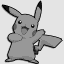

In [27]:
low_res_bw_decode_array = []
for row in range(len(ascii_image)):
    current_row = []
    for cell in range(len(ascii_image[row])):
        current_row.append(sorted_list_dictionary[ascii_image[row][cell]])
    
    low_res_bw_decode_array.append(current_row)
    
#print(low_res_bw_decode_array)

low_res_bw_decode_numpy = np.array(low_res_bw_decode_array)

low_res_bw_decode_image = Image.fromarray(low_res_bw_decode_numpy.astype('uint8'))
# Shows the image
display(low_res_bw_decode_image)



In [122]:
output_folder_path = 'output-imgs'

num_of_files = len(os.listdir(output_folder_path))

image_filename = "img-" + str(num_of_files) + ".png"

image_filepath = os.path.join(output_folder_path, image_filename)

low_res_bw_decode_image.save(image_filepath)